In [1]:
from inventory_impairment_class import InventoryImpairment
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
data = pd.read_excel('./data/inventory_data_new.xlsx')

In [3]:
model = InventoryImpairment()

# Fit the model
model.fit(data, variability=0.5)

Original Data shape: (1381, 17)
Created Stock data shape: (383, 17)
Calculating monthly data...
       material  unitats_2022  vendes_2022  preu_venda_unitari_2022  \
4   114230822.0     1018500.0     54892.49                 0.053895   
10  115030252.0       75900.0      6825.62                 0.089929   
15  115070602.0      884000.0    100307.84                 0.113470   
21  115130209.0       23217.0      5179.48                 0.223090   
23  115170581.0      357000.0     26188.50                 0.073357   
30  116211401.0      180000.0     20998.44                 0.116658   
36  116490250.0           NaN          NaN                      NaN   
37  116490259.0      152600.0     24814.65                 0.162612   
43  118030902.0      711900.0    100467.24                 0.141125   
44  118030904.0      376560.0     56967.80                 0.151285   

    unitats_2023  vendes_2023  preu_venda_unitari_2023  \
4       885500.0     58951.87                 0.066575   
10    

In [4]:
# Predict the impairment
impairment = model.predict()

INDEXS_INTERPRETATION CALLED WITH --> len auto_arima_indexs: (383,), len auto_encoder_indexs: (383,), len impairment_index: (383,), shape data: (383, 18)
NaN values in auto_encoder indexs start:  0
NaN values in auto_encoder indexs assign:  0
Rounded merged indexs: [0.07, 0.07, 0.07, 0.05, 0.17, 0.17, 0.01, 0.1, 0.09, 0.11, 0.08, 0.09, 0.12, 0.06, 0.01, 0.09, 0.14, 0.53, 0.15, 0.17, 0.05, 0.12, 0.02, 0.44, 0.11, 0.14, 0.08, 0.11, 0.16, 0.96, 0.1, 0.21, 0.11, 0.27, 0.14, 1.15, 0.36, 0.1, 0.16, 0.06, 0.07, 0.55, 0.11, 0.09, 0.08, 0.12, 0.1, 0.07, 0.02, 0.13, 0.11, 0.1, 0.13, 0.14, 0.08, 0.13, 0.63, 0.07, 0.1, 0.09, 0.11, 0.11, 0.1, 0.09, 0.45, 0.09, 0.17, 0.15, 0.18, 0.11, 0.25, 0.09, 0.25, 0.09, 1.27, 0.06, 0.03, 0.1, 0.64, 0.16, 0.44, 0.1, 0.12, 0.09, 0.53, 0.08, 1.79, 0.02, 0.1, 0.66, 0.36, 0.03, 0.11, 0.09, 0.07, 0.0, 0.25, 0.15, 0.19, 0.57, 0.51, 0.12, 0.48, 0.08, 0.94, 0.11, 0.08, 0.09, 0.19, 0.09, 0.15, 0.13, 0.24, 0.22, 0.14, 0.27, 0.19, 0.23, 0.33, 0.07, 0.33, 0.08, 0.24, 0.14, 

In [5]:
impairment.head(30)

,index,material,unitats_2022,vendes_2022,preu_venda_unitari_2022,unitats_2023,vendes_2023,preu_venda_unitari_2023,variacio_preu_venda_unitari_2022_2023,proporcio_variacio_preu_venda_unitari_2022_2023,...,diferencia_entrada_sortida,stock_final_2023,valor_total_stock_2023,cost_unitari_stock_2023,auto_arima_index,autoencoder_index,impairment_index,merged_indexs,fair_price,new_value
0,4,114230822.0,1018500.0,54892.49,0.053895,885500.0,58951.87,0.066575,0.012679,0.235256,...,-15.0,66500.0,2292.96,0.034481,0.069469,0.000000,0.000000,0.069469,0.066248,0.034481
1,10,115030252.0,75900.0,6825.62,0.089929,27600.0,2127.68,0.077090,-0.012839,-0.142771,...,-50.0,23000.0,1777.15,0.077267,0.019483,0.000000,0.051069,0.070551,0.076275,0.076275
2,15,115070602.0,884000.0,100307.84,0.113470,340000.0,34522.45,0.101537,-0.011934,-0.105171,...,13.0,100000.0,5732.32,0.057323,0.038441,0.027269,0.000000,0.065710,0.101209,0.057323
3,21,115130209.0,23217.0,5179.48,0.223090,15600.0,3770.68,0.241710,0.018620,0.083465,...,13.0,9600.0,2298.10,0.239385,0.038173,0.000000,0.007279,0.045452,0.245193,0.239385
4,23,115170581.0,357000.0,26188.50,0.073357,1023000.0,74195.50,0.072527,-0.000830,-0.011311,...,13.0,42000.0,2140.13,0.050955,0.122251,0.044645,0.000000,0.166897,0.067080,0.050955
5,30,116211401.0,180000.0,20998.44,0.116658,1533600.0,156152.48,0.101821,-0.014837,-0.127185,...,1.0,36000.0,3143.70,0.087325,0.119130,0.047483,0.000000,0.166613,0.092511,0.087325
6,36,116490250.0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.000000,0.000000,...,2.0,26437.0,2211.43,0.083649,0.000000,0.007369,0.000000,0.007369,0.004403,0.004403
7,37,116490259.0,152600.0,24814.65,0.162612,152600.0,26612.66,0.174395,0.011783,0.072458,...,5.0,15400.0,1386.79,0.090051,0.069515,0.028508,0.000000,0.098023,0.170971,0.090051
8,43,118030902.0,711900.0,100467.24,0.141125,741400.0,109717.26,0.147987,0.006861,0.048617,...,9.0,56000.0,6892.27,0.123076,0.069361,0.019006,0.000000,0.088367,0.144495,0.123076
9,44,118030904.0,376560.0,56967.80,0.151285,308000.0,51353.82,0.166733,0.015448,0.102115,...,2.0,14700.0,1809.22,0.123076,0.078838,0.029059,0.000000,0.107897,0.160838,0.123076


In [16]:
total_value = 0
for index, element in impairment[impairment["fair_price"] == impairment["new_value"]].iterrows():
    total_value += element["valor_total_stock_2023"] - element["stock_final_2023"] * element["fair_price"]
print(f"Valor total devaluat: {total_value}")

388952.569166275

In [44]:
import numpy as np
impairment['depreciation'] = impairment["preu_venda_unitari_2023"]  - impairment["new_value"]

max_depreciation_row = impairment.loc[np.argsort(impairment['depreciation'], axis=0)[0]]

print("Element with the most depreciation:")
print(max_depreciation_row)

87
Element with the most depreciation:
index                                                              287
material                                                   136170182.0
unitats_2022                                                   22000.0
vendes_2022                                                    3143.14
preu_venda_unitari_2022                                        0.14287
unitats_2023                                                       0.0
vendes_2023                                                        0.0
preu_venda_unitari_2023                                            0.0
variacio_preu_venda_unitari_2022_2023                              0.0
proporcio_variacio_preu_venda_unitari_2022_2023                    0.0
data_darrera_entrada                               2024-02-14 00:00:00
dies_ultima_entrada                                              -45.0
data_darrera_sortida                               2024-02-23 00:00:00
dies_ultima_sortida                   

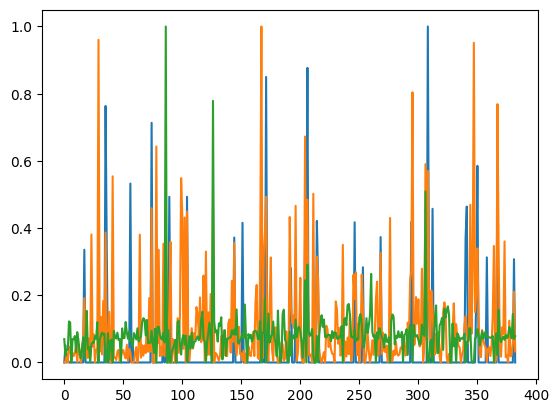

In [8]:
import matplotlib.pyplot as plt
plt.plot(impairment["impairment_index"])
plt.plot(impairment["autoencoder_index"])
plt.plot(impairment["auto_arima_index"])

In [7]:
# Explain the model
model.explain()

y has 1 na's
0      1.921318
1      0.987151
2      1.765590
3      1.024259
4      1.316451
         ...   
378    1.589538
379   -0.033647
380    1.360742
381    0.772264
382    1.078418
Length: 383, dtype: float64


KeyboardInterrupt: 